In [1]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical 
from keras import backend as K
import tensorflow as tf

import keras.layers as layers

import numpy as np

2023-01-25 14:30:43.475860: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
batch_size = 32
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28

In [3]:
# download your dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [14]:
class_names = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

In [15]:
print('Channels order: {}'.format(K.image_data_format()))

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Channels order: channels_last


In [16]:
# Let's see some insights
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [17]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [18]:
for i in range(9):
    print(y_train[i])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0.

#### Assignment 1. Visualize 36 examples from train set in a 6x6 table.
Use class_names instead of class indeces  
Hint: use plt.xlabel( ... )  
Hint: https://thispointer.com/python-numpy-select-elements-or-indices-by-conditions-from-numpy-array/

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

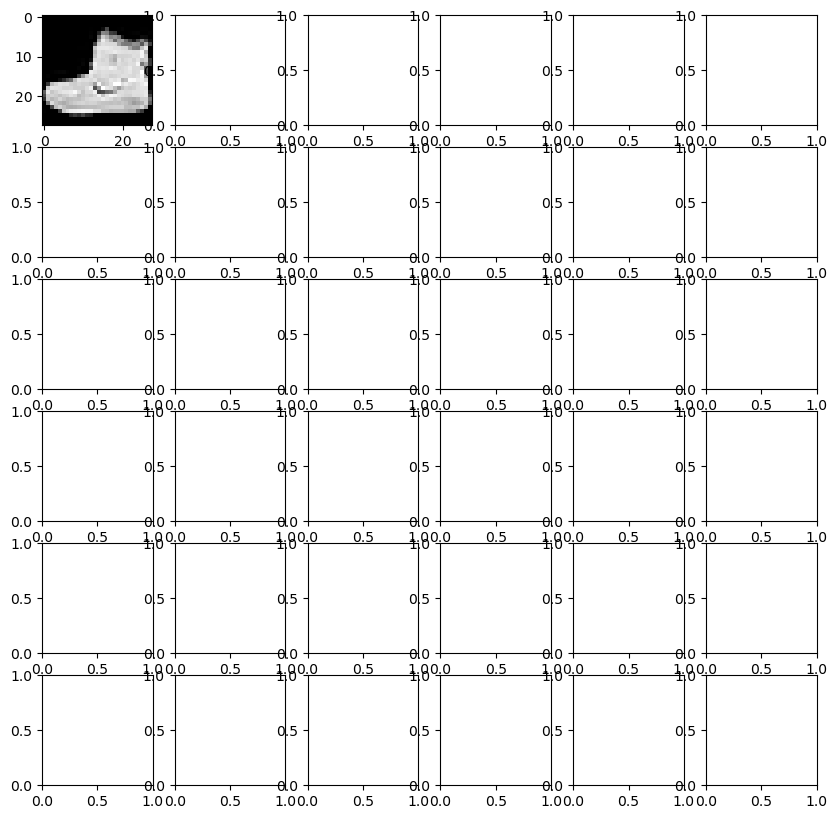

In [20]:
# your code here
n = 0

fig, axs = plt.subplots(6, 6)
fig.set_facecolor('white')
fig.set_size_inches(10,10)

index=0
for i in range(6):
    for j in range(6):
        axs[i][j].imshow(x_train[index].reshape((28,28)), cmap=plt.get_cmap('gray'))
        # plt.xlabel()
        axs[i][j].set_xlabel(class_names[y_train[index] > 0])
        axs[i][j].axes.xaxis.set_ticks([])
        axs[i][j].axes.yaxis.set_ticks([])
        index+=1
plt.show()

#### Assignment 2. Make a CNN by the schema given in slides (the last slide)

In [21]:
# your code here
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

model = keras.Sequential([
    layers.Input(28,28,1), #28x28 pixels wih 1 channel
    layers.Conv2D(64,7),
    layers.MaxPooling2D(2),
    layers.Conv2D(256,3,activation="relu", padding="SAME"),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128,name="dense128",activation="relu"),
    layers.Dropout(0.3), #Will dropout 30% of the neurons during training to prevent overfitting
    layers.Dense(10, name="dense10", activation="softmax"),
    ]

)

TypeError: Expected `name` argument to be a string, but got: 1

In [22]:
model.summary()

NameError: name 'model' is not defined

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

NameError: name 'model' is not defined

In [ ]:
result = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(result.history["loss"], label="Train loss")
plt.plot(result.history["val_loss"], label="Test loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend();

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(result.history["acc"], label="Train accuracy")
plt.plot(result.history["val_acc"], label="Test accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

In [ ]:
model.evaluate(x_test, y_test, verbose=0)

#### Assignment 3. Run some predictions to see the model performance

In [ ]:
# your code here
predictions = model.predict_on_batch(x_test[:36])

fig, axs = plt.subplots(6, 6)
fig.set_facecolor('white')
fig.set_size_inches(10,10)

index=0
for i in range(6):
    for j in range(6):
        probability = predictions[index][np.argmax(predictions[index])]
        label = class_names[np.argmax(predictions[index])]

        axs[i][j].imshow(x_test[index].reshape((28,28)), cmap=plt.get_cmap('gray'))
        # plt.xlabel()
        axs[i][j].set_xlabel(label+" "+str((probability*100).__round__(1))+"%")
        axs[i][j].axes.xaxis.set_ticks([])
        axs[i][j].axes.yaxis.set_ticks([])
        index+=1
plt.show()